In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api  as sm

#Importing OLS model
from statsmodels.formula.api import ols

In [74]:
dataset = sns.load_dataset('penguins')
dataset_sub = dataset[dataset['species'] != 'chinstrap']
dataset_final = dataset_sub.dropna()
dataset_final.reset_index(drop = True, inplace= True)


In [75]:
dataset_final.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [76]:
#sns.pairplot(dataset)

In [77]:
# Subsetting data to isolate our variable of interest
ols_data = dataset_final[['body_mass_g', 'flipper_length_mm']]

In [78]:
ols_formula = 'body_mass_g ~ flipper_length_mm'

# '~' sign tells that the value after this is our X variable

In [79]:
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Sat, 20 May 2023   Prob (F-statistic):          3.13e-105
Time:                        15:10:30   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
# Subset X variable
X = ols_data['flipper_length_mm']

# get predictions from model
fitted_values = model.predict(X)


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

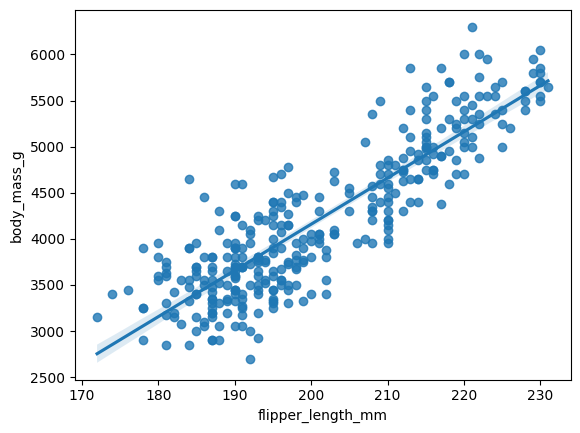

In [81]:
sns.regplot(x='flipper_length_mm', y= 'body_mass_g', data= ols_data)

Creating a graph of fitted values against residuals

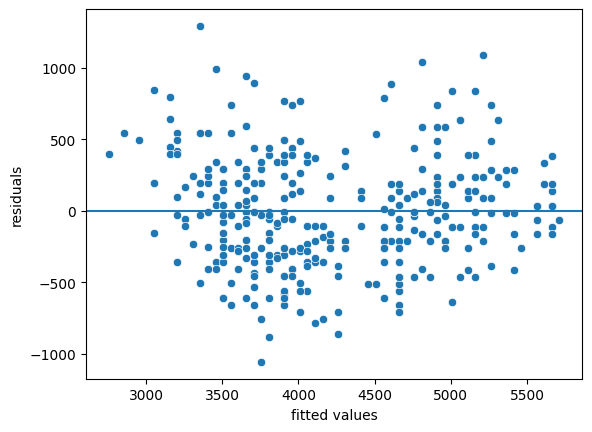

In [67]:
fig = sns.scatterplot(x= fitted_values, y= residuals)
fig.axhline(0)
fig.set_xlabel('fitted values')
fig.set_ylabel('residuals')
plt.show()

In [82]:
# Calculate residuals
residuals = model.resid


<Axes: ylabel='Count'>

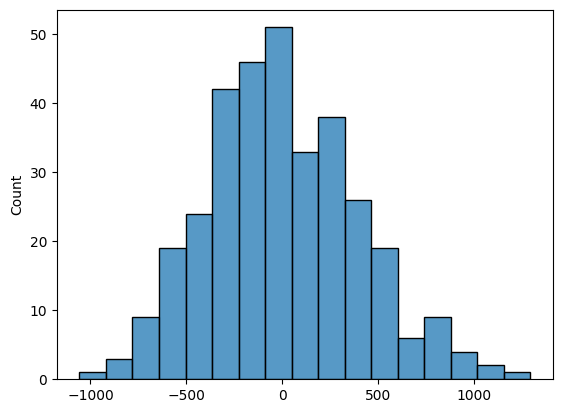

In [86]:
sns.histplot(residuals)

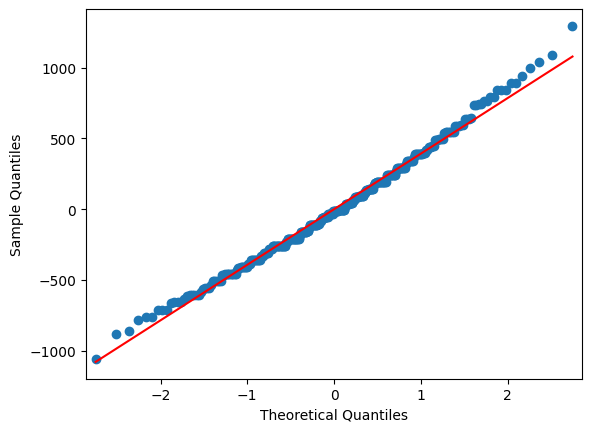

In [85]:
# Check normality Assumptions
fig = sm.qqplot(residuals, line ='s')
plt.show()